# Housing prices exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [3]:
cols_to_drop = []

Pave    1454
Grvl       6
Name: Street, dtype: int64


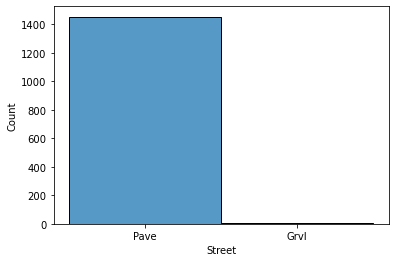

In [4]:
print(train['Street'].value_counts(dropna=False))
sns.histplot(data=train['Street'], element='bars')
#All values are almost the same => drop feature 
cols_to_drop.append('Street')

In [5]:
train['Alley'].value_counts(dropna=False)
#Too many homes don't have alley access, but somewhat uniform distribution between ones that do => keep feature

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


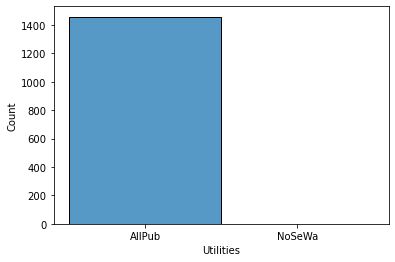

In [6]:
print(train['Utilities'].value_counts(dropna=False))
sns.histplot(data=train['Utilities'], element='bars')
#All values are almost the same => drop feature
cols_to_drop.append('Utilities')

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

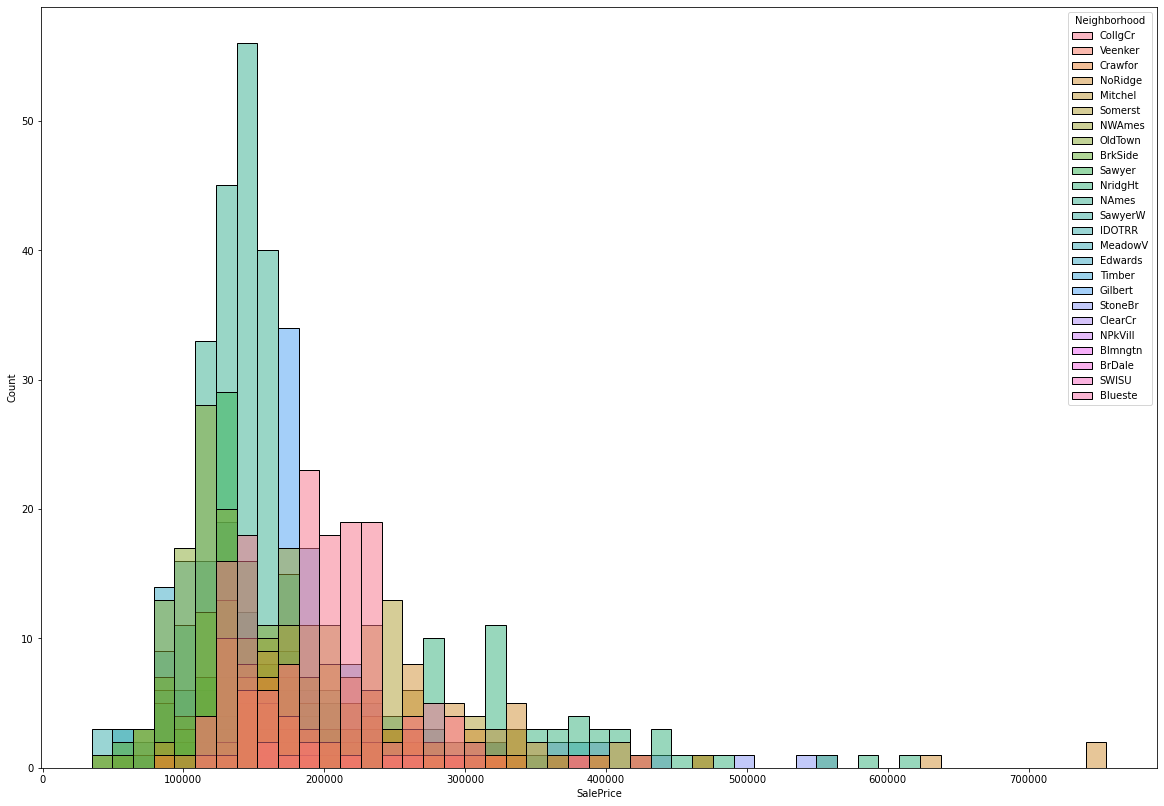

In [7]:
print(train['Neighborhood'].value_counts(dropna=False))
plt.figure(figsize=(20,14))
sns.histplot(data=train, x="SalePrice", hue="Neighborhood")
#While there are several categories for Neighborhood, thereby making the one-hot encoding bulky, the relation with
#SalePrice seems significant => keep feature

In [8]:
print(train['Condition1'].value_counts(dropna=False))
print(train['Condition2'].value_counts(dropna=False))
#Condition2 is provided in addition to Condition1. It assumes the same value for most features => drop feature 
cols_to_drop.append('Condition2')

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64


In [9]:
print(train['Exterior1st'].value_counts(dropna=False))
print(train['Exterior2nd'].value_counts(dropna=False))
#Both seem to have a decent spread of values => keep features 

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64


<AxesSubplot:xlabel='MasVnrArea', ylabel='Count'>

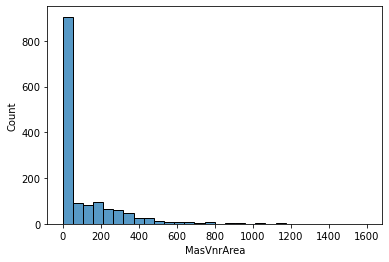

In [10]:
print(train['MasVnrType'].value_counts(dropna=False))
sns.histplot(data=train['MasVnrArea'], element='bars', bins=30)
#Fill missing values for MasVnrType with mode. Fill missing values for MasVnrArea with 0 as mode for MasVnrType
#is None

In [11]:
print(train['BsmtQual'].value_counts(dropna=False))
#NaN indicates that those houses don't have a basement. Only 37 houses don't have a basement => keep feature 

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64


In [12]:
print(train['BsmtExposure'].value_counts(dropna=False))
#NaN => no basement, No => no exposure. Most basements have no exposure, but a significant number have a basement
#and therefore the feature is useful => keep feature

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64


In [13]:
print(train['BsmtFinType1'].value_counts(dropna=False))
print(train['BsmtFinType2'].value_counts(dropna=False))
print((train['BsmtFinType1'] == train['BsmtFinType2']).sum())
#Hard to judge if these features will be super useful, but keep for now. 

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
431


0
0


<AxesSubplot:xlabel='BsmtFinSF1', ylabel='Count'>

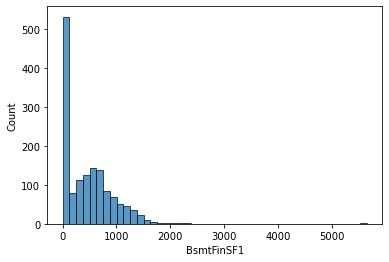

In [14]:
print(train['BsmtFinSF1'].isnull().sum())
print(train['BsmtFinSF2'].isnull().sum())
sns.histplot(data=train['BsmtFinSF1'], element='bars')

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='Count'>

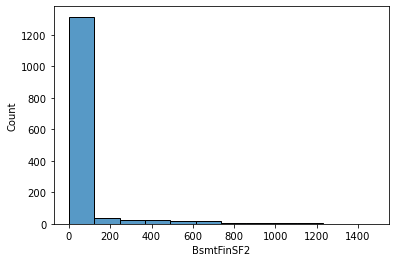

In [15]:
sns.histplot(data=train['BsmtFinSF2'], element='bars')

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='Count'>

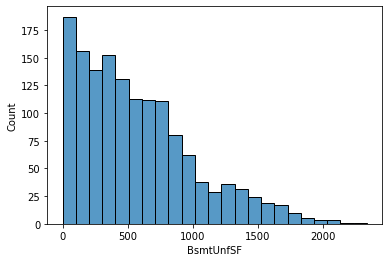

In [16]:
sns.histplot(data=train['BsmtUnfSF'], element='bars')

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64


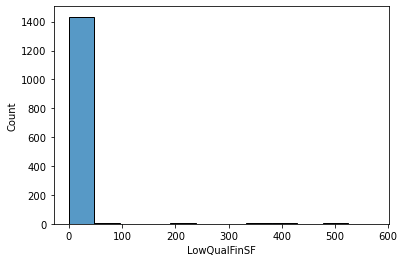

In [17]:
print(train['LowQualFinSF'].value_counts(dropna=False))
sns.histplot(data=train['LowQualFinSF'], element='bars')
#This feature seems oddly specific and has almost all the same value => drop feature
cols_to_drop.append('LowQualFinSF')

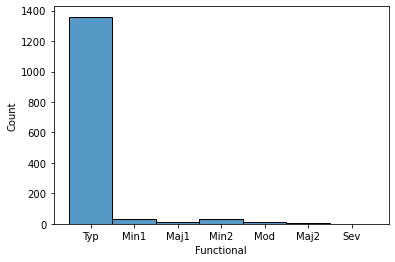

In [18]:
sns.histplot(data=train['Functional'], element='bars')
#This feature has almost all the same value => drop feature
cols_to_drop.append('Functional')

In [19]:
print(train['Fence'].value_counts(dropna=False))
#This feature has a somewhat decent distribution but does not seem to relevant to the target value => drop feature
cols_to_drop.append('Fence')

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64


NaN     1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64


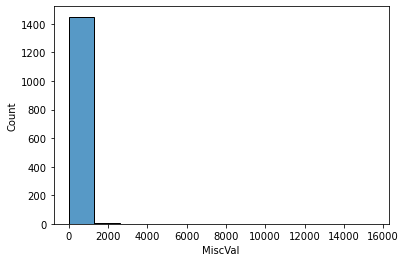

In [20]:
print(train['MiscFeature'].value_counts(dropna=False))
sns.histplot(data=train['MiscVal'], element='bars')
#While MiscFeature alludes to an additional feature of the house that has not already been described in the 
#previous columns, MiscVal is a second-order variable describing 'some value' (unclear what?) of the Miscfeature.
#It does not seem to add much useful information => drop MiscVal
cols_to_drop.append('MiscVal')

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

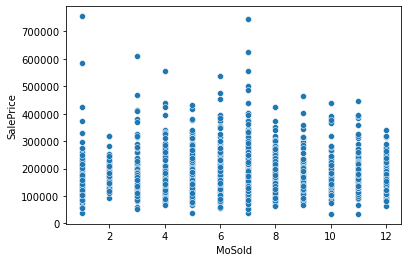

In [21]:
sns.scatterplot(data=train, x="MoSold", y="SalePrice") 
#Although correlation is not apparent, keep the feature for now 

In [22]:
cols_to_drop

['Street',
 'Utilities',
 'Condition2',
 'LowQualFinSF',
 'Functional',
 'Fence',
 'MiscVal']